In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Permet de mettre l'ensemble des données dans une variable
train = pd.read_csv("data/train.csv")
#Affiche les 10 premiers valeurs
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Affiche le nombre de donnée par variable
print(train.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [4]:
#shape renvoie la dimension de la matrice (2,2), shape[0] = premiere dimension, shape[1] = deuxieme dimension
total = train.shape[0]
print("Nombre de lignes:", train.shape[0])
print("Nombre de colonnes:", train.shape[1])
#train.columns renvoie un String avec les noms des colonnes
print("Colonnes:", ", ".join(train.columns))

Nombre de lignes: 891
Nombre de colonnes: 12
Colonnes: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [5]:
#renvoie un tableau avec le nombre d'élément manquant par variable
def df_manquant(df):
    count = df.count()
    result = {}
    for key in df.keys():
        left = total - count[key]
        if( left > 0 ):
            result[key] = left
    return pd.DataFrame(result, index=[0])

result1 = df_manquant(train)
print(result1)


   Age  Cabin  Embarked
0  177    687         2


Nombre de survivants: 342
Nombre de morts: 549


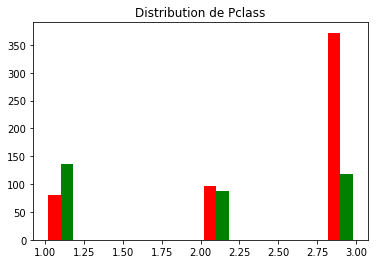

In [6]:
#Deux maniere de trouver le nombre de survivant ou de mort
#1
print("Nombre de survivants:",train["Survived"].value_counts()[1])
#2
print("Nombre de morts:",len(train[train["Survived"]==0]))

#fonction qui permet d'avoir un graphique d'une dataFrame et d'une varible
def plot(df, feature):
    survived = train[train["Survived"]==1]
    dead = train[train["Survived"]==0]
    x1 = np.array(dead[feature])
    x2 = np.array(survived[feature])
    plt.hist([x1, x2], color=['r', 'g'])
    plt.title('Distribution de ' + feature)
    plt.show()
plot(train, 'Pclass')

In [7]:
#remplace les valeurs vides par la median, et pour les strings, la valeur la plus récurrente
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
train['sex_encoded'] = le_sex.fit_transform(train.Sex)
median = train.median()
train["Age"].fillna(median["Age"], inplace=True)
train["Cabin"].fillna(train["Cabin"].mode()[0], inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

In [8]:
#Verification
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,0


In [9]:
#Test s'il y a encore des valeurs vides
result2 = df_manquant(train)
print(result2)

Empty DataFrame
Columns: []
Index: [0]


In [10]:
#Verification
print(train.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
sex_encoded    891
dtype: int64


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
#keep = list(train.keys())
#keep.remove("Survived")
#ep = ["SibSp", "Parch", "Fare", "sex_encoded"]
#keep = ["Pclass", "Parch", "SibSp"]
#keep = ["Pclass", "Age", "Fare"]
#keep = ["SibSp",, "Parch" "Age", "Fare"]
keep = ["SibSp", "Parch" ,"Age"]
def df_score(df, keep, division):
    print("Keeping:", ", ".join(keep))
    list_test_size = [a/division for a in list(range(division))][1:]
    scores = []
    for ts in list_test_size:
        X_train, X_test, y_train, y_test = train_test_split(df[keep], df["Survived"], test_size=0.1, random_state=0)
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        scores.append(logreg.score(X_test, y_test))
    return scores
scores = df_score(train,keep, 20)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Age
[0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116, 0.61111111111111116]
Accuracy: 61.11%


/usr/lib/python3/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn import preprocessing

def dummify_features(df):
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])
    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)
    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)
    return X, dummy_colnames, enc

to_dummify = ["Pclass"]

X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

print(X_dummy)

     Pclass_1  Pclass_2  Pclass_3
0         0.0       0.0       1.0
1         1.0       0.0       0.0
2         0.0       0.0       1.0
3         1.0       0.0       0.0
4         0.0       0.0       1.0
5         0.0       0.0       1.0
6         1.0       0.0       0.0
7         0.0       0.0       1.0
8         0.0       0.0       1.0
9         0.0       1.0       0.0
10        0.0       0.0       1.0
11        1.0       0.0       0.0
12        0.0       0.0       1.0
13        0.0       0.0       1.0
14        0.0       0.0       1.0
15        0.0       1.0       0.0
16        0.0       0.0       1.0
17        0.0       1.0       0.0
18        0.0       0.0       1.0
19        0.0       0.0       1.0
20        0.0       1.0       0.0
21        0.0       1.0       0.0
22        0.0       0.0       1.0
23        1.0       0.0       0.0
24        0.0       0.0       1.0
25        0.0       0.0       1.0
26        0.0       0.0       1.0
27        1.0       0.0       0.0
28        0.0 

/usr/lib/python3/dist-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
echantillon = X_dummy.join(train)

In [14]:
keep = ["SibSp", "Parch" ,"Fare", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded"]
scores = df_score(echantillon, keep, 20)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Fare, Pclass_1, Pclass_2, Pclass_3, sex_encoded
[0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219]
Accuracy: 82.22%


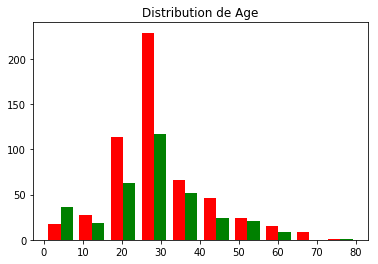

In [15]:

#survived = train[train["Survived"]==1]
#dead = train[train["Survived"]==0]
#x1 = np.array(dead['Age'])
#x2 = np.array(survived['Age'])
#plt.hist([x1, x2], color=['r', 'g'])
#plt.title('Distribution de ' + 'Age')
#plt.show()
plot(train, 'Age')


In [16]:
echantillon['is_child'] = echantillon["Age"] < 8
cols = [c for c in echantillon.columns if 'Age' not in c]
echantillon1 = echantillon[cols]

keep = ["SibSp", "Parch", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded","Age", "is_child"]
scores = df_score(echantillon, keep, 2)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Pclass_1, Pclass_2, Pclass_3, sex_encoded, Age, is_child
[0.81111111111111112]
Accuracy: 81.11%


In [17]:
echantillon.head()

,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded,is_child
0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,False
1,1.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,False
2,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,False
3,1.0,0.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,False
4,0.0,0.0,1.0,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,False


In [18]:
echantillon['Title'] = echantillon.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
echantillon['Title'] = echantillon['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Rare'
)

echantillon['Title'] = echantillon['Title'].replace('Mlle', 'Miss')
echantillon['Title'] = echantillon['Title'].replace('Ms', 'Miss')
echantillon['Title'] = echantillon['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
echantillon['Title'] = echantillon['Title'].map(title_mapping)

In [19]:
echantillon.head()

,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded,is_child,Title
0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,False,1
1,1.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,False,3
2,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,False,2
3,1.0,0.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,False,3
4,0.0,0.0,1.0,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,False,1


In [20]:
keep = ["SibSp", "Parch", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded","Age", "is_child"]
scores = df_score(echantillon, keep, 2)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Pclass_1, Pclass_2, Pclass_3, sex_encoded, Age, is_child
[0.81111111111111112]
Accuracy: 81.11%


In [21]:
to_dummify = ["Title"]

X_dummyTitle, dummy_columnsTitle, dummy_encoderTitle = dummify_features(echantillon[to_dummify])
X_dummyTitle = pd.DataFrame(X_dummyTitle.toarray(), columns=dummy_columnsTitle)

print(X_dummyTitle)

     Title_1  Title_2  Title_3  Title_4  Title_5
0        1.0      0.0      0.0      0.0      0.0
1        0.0      0.0      1.0      0.0      0.0
2        0.0      1.0      0.0      0.0      0.0
3        0.0      0.0      1.0      0.0      0.0
4        1.0      0.0      0.0      0.0      0.0
5        1.0      0.0      0.0      0.0      0.0
6        1.0      0.0      0.0      0.0      0.0
7        0.0      0.0      0.0      1.0      0.0
8        0.0      0.0      1.0      0.0      0.0
9        0.0      0.0      1.0      0.0      0.0
10       0.0      1.0      0.0      0.0      0.0
11       0.0      1.0      0.0      0.0      0.0
12       1.0      0.0      0.0      0.0      0.0
13       1.0      0.0      0.0      0.0      0.0
14       0.0      1.0      0.0      0.0      0.0
15       0.0      0.0      1.0      0.0      0.0
16       0.0      0.0      0.0      1.0      0.0
17       1.0      0.0      0.0      0.0      0.0
18       0.0      0.0      1.0      0.0      0.0
19       0.0      0.

/usr/lib/python3/dist-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [22]:
echantillon = X_dummyTitle.join(echantillon)

In [23]:
keep = ["SibSp", "Parch","Fare", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded", "is_child","Title_1","Title_2","Title_3","Title_4","Title_5"]
scores = df_score(echantillon, keep, 5)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Fare, Pclass_1, Pclass_2, Pclass_3, sex_encoded, is_child, Title_1, Title_2, Title_3, Title_4, Title_5
[0.84444444444444444, 0.84444444444444444, 0.84444444444444444, 0.84444444444444444]
Accuracy: 84.44%


In [24]:
echantillon.head()

,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,...,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded,is_child,Title
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,...,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,False,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1,...,38.0,1,0,PC 17599,71.2833,C85,C,0,False,3
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,...,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,False,2
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4,1,...,35.0,1,0,113803,53.1000,C123,S,0,False,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0,...,35.0,0,0,373450,8.0500,B96 B98,S,1,False,1


In [104]:
echantillon['FamilySize'] = echantillon["SibSp"] + echantillon["Parch"] + 1
echantillon["Embarked_encoded"] = echantillon["Embarked"].map(dict(zip(("S", "C", "Q"), (0, 1, 2))))

In [193]:
echantillon.head()

,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_1,Pclass_2,Pclass_3,PassengerId,Survived,...,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded,is_child,Title,FamilySize,Embarked_encoded
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,...,0,A/5 21171,7.2500,B96 B98,S,1,False,1,2,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1,...,0,PC 17599,71.2833,C85,C,0,False,3,2,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,...,0,STON/O2. 3101282,7.9250,B96 B98,S,0,False,2,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4,1,...,0,113803,53.1000,C123,S,0,False,3,2,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0,...,0,373450,8.0500,B96 B98,S,1,False,1,1,0


In [220]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

predictors = ["SibSp", "Parch","Fare", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded", "is_child","Title_1","Title_2","Title_3","Title_4","Title_5","FamilySize"]
X_train, X_test, y_train, y_test = train_test_split(echantillon[predictors], echantillon["Survived"])


In [221]:
forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=80,
                                min_samples_leaf=5,
                                random_state=0)
forest.fit(X_train, y_train)
print("Random Forest score: {:.2f}%".format(forest.score(X_test, y_test)*100))

Random Forest score: 84.30%


In [ ]:
def random_range(df):
    RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=80,
                                min_samples_leaf=5,
                                random_state=0)
    forest.fit(X_train, y_train)

    return X, dummy_colnames, enc

In [149]:
keep = ["SibSp", "Parch","Fare", "Pclass_1","Pclass_2","Pclass_3", "sex_encoded", "is_child","Title_1","Title_2","Title_3","Title_4","Title_5","FamilySize","Embarked_encoded"]
scores = df_score(echantillon, keep, 5)
print(scores)
print('Accuracy: {:.2f}%'.format(np.array(scores).mean()*100))

Keeping: SibSp, Parch, Fare, Pclass_1, Pclass_2, Pclass_3, sex_encoded, is_child, Title_1, Title_2, Title_3, Title_4, Title_5, FamilySize, Embarked_encoded
[0.83333333333333337, 0.83333333333333337, 0.83333333333333337, 0.83333333333333337]
Accuracy: 83.33%
